In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load data
dataset = pd.read_csv('../../../../datasets/customer_purchase_data.csv')
dataset.head()

,Age,Salary,City,Time_Spent_Minutes,Pages_Visited,Purchased
0,56.0,136748.0,Mumbai,14,11,0
1,46.0,25287.0,Chennai,10,3,0
2,32.0,146593.0,Hyderabad,80,8,1
3,NaN,54387.0,Delhi,16,3,0
4,NaN,28512.0,Bangalore,54,14,0


In [33]:
# Check shape
dataset.shape

(1050, 6)

In [34]:
# Check info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   float64
 1   Salary              997 non-null    float64
 2   City                1000 non-null   object 
 3   Time_Spent_Minutes  1050 non-null   int64  
 4   Pages_Visited       1050 non-null   int64  
 5   Purchased           1050 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 49.3+ KB


In [35]:
# Check statistics
dataset.describe()

,Age,Salary,Time_Spent_Minutes,Pages_Visited,Purchased
count,1000.000000,997.000000,1050.000000,1050.000000,1050.000000
mean,41.041000,85469.841525,58.707619,15.407619,0.403810
std,13.491454,37987.721856,33.721158,8.380463,0.490894
min,18.000000,20060.000000,1.000000,1.000000,0.000000
25%,29.000000,52413.000000,30.000000,8.000000,0.000000
50%,42.000000,85155.000000,57.000000,16.000000,0.000000
75%,52.000000,117720.000000,87.750000,23.000000,1.000000
max,64.000000,149972.000000,119.000000,29.000000,1.000000


In [36]:
# Check duplicates
dataset[dataset.duplicated()]

,Age,Salary,City,Time_Spent_Minutes,Pages_Visited,Purchased
1000,26.0,107487.0,Delhi,74,25,1
1001,38.0,107388.0,Hyderabad,108,23,1
1002,48.0,92355.0,Mumbai,65,22,1
1003,59.0,110327.0,Bangalore,45,21,0
1004,21.0,66542.0,Mumbai,111,19,0
1005,25.0,45931.0,Hyderabad,24,2,0
1006,58.0,NaN,Hyderabad,84,15,1
1007,40.0,107127.0,Mumbai,25,25,0
1008,56.0,80279.0,Mumbai,12,18,0
1009,23.0,93543.0,Hyderabad,105,5,1


In [37]:
# Conform duplicates
dataset.query("Salary==107487.0")

,Age,Salary,City,Time_Spent_Minutes,Pages_Visited,Purchased
96,26.0,107487.0,Delhi,74,25,1
1000,26.0,107487.0,Delhi,74,25,1


In [38]:
# Drop duplicates
dataset.drop_duplicates(inplace=True)

In [39]:
# Check duplicates
dataset.duplicated().sum()

np.int64(0)

In [40]:
# Check for null value columns
dataset.isnull().any()

Age                    True
Salary                 True
City                   True
Time_Spent_Minutes    False
Pages_Visited         False
Purchased             False
dtype: bool

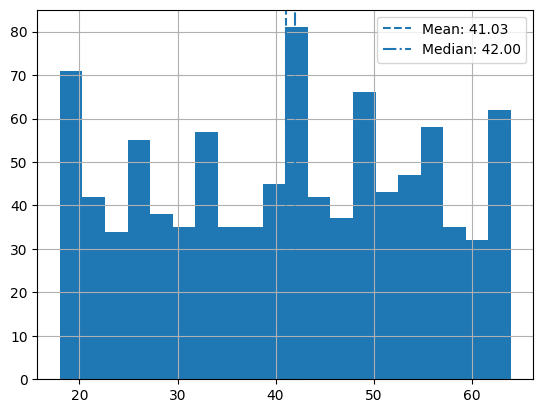

In [41]:
# Check for Age data distribution
age_mean = dataset.Age.mean()
age_median = dataset.Age.median()

dataset.Age.hist(bins=20)
plt.axvline(age_mean, linestyle='--', label=f'Mean: {age_mean:.2f}')
plt.axvline(age_median, linestyle='-.', label=f'Median: {age_median:.2f}')

plt.legend()

<Axes: title={'center': 'Age Box Plot'}>

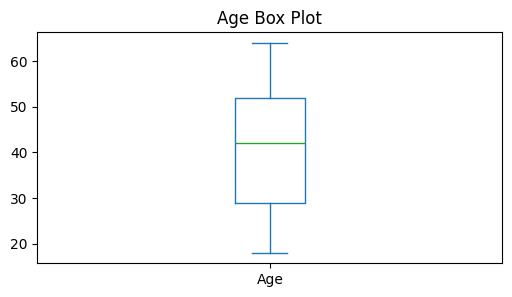

In [42]:
# Check for outliers in Age
dataset['Age'].plot(kind='box', figsize=(6, 3), title="Age Box Plot")

In [43]:
# Check skew of Age
# ~0 → symmetric
# > +1 → right-skewed (long tail)
# < -1 → left-skewed
dataset.Age.skew()

np.float64(-0.05593774725755523)

In [44]:
# Fill Age with mean
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [45]:
# Conform all nulls are filled
dataset.Age.isnull().sum()

np.int64(0)

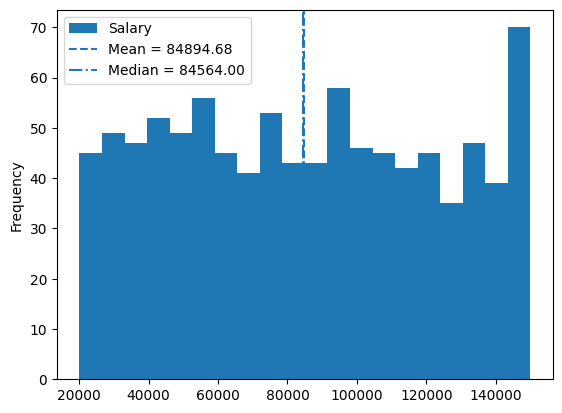

In [46]:
# Histogram for Salary data distribution
salary_mean = dataset.Salary.mean()
salary_median = dataset.Salary.median()

dataset['Salary'].plot(kind='hist', bins=20)
plt.axvline(salary_mean, linestyle='--', label=f'Mean = {salary_mean:.2f}')
plt.axvline(salary_median, linestyle='-.', label=f'Median = {salary_median:.2f}')

plt.legend()

<Axes: title={'center': 'Salary Box Plot'}>

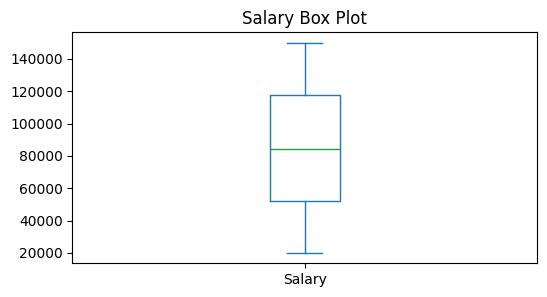

In [47]:
# Box plot for outliers
dataset['Salary'].plot(kind='box', figsize=(6, 3), title="Salary Box Plot")

In [48]:
# Check skew of Salary
dataset['Salary'].skew()

np.float64(0.05391317679581269)

In [49]:
# Fill Salary with mean
dataset.Salary = dataset.Salary.fillna(dataset.Salary.mean())

In [50]:
# Conform all nulls are filled
dataset.Salary.isnull().sum()

np.int64(0)

In [51]:
# Count City values
dataset['City'].value_counts()

City
Hyderabad    212
Chennai      204
Mumbai       193
Delhi        181
Bangalore    160
Name: count, dtype: int64

<Axes: ylabel='count'>

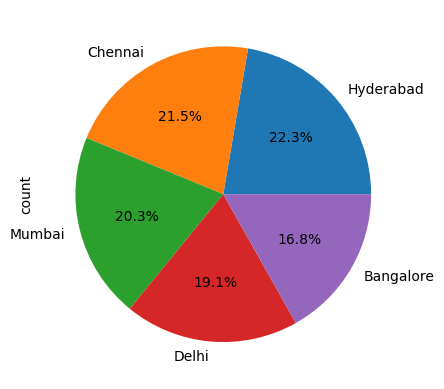

In [22]:
# Pie chart for City
dataset['City'].value_counts().plot.pie(autopct='%1.1f%%')

In [23]:
dataset['City'].value_counts(), 262/dataset['City'].value_counts().sum()

(City
 Hyderabad    212
 Chennai      204
 Mumbai       193
 Delhi        181
 Bangalore    160
 Name: count, dtype: int64,
 np.float64(0.27578947368421053))

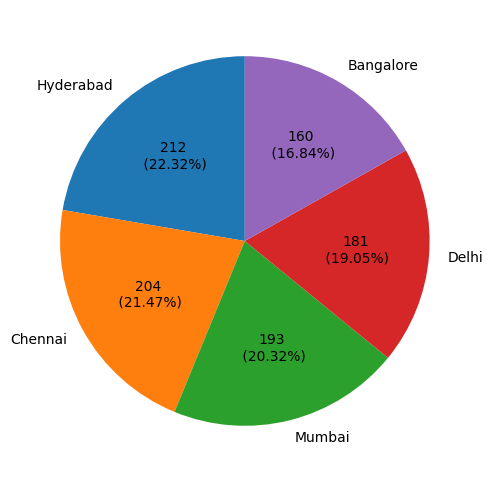

In [24]:
def autopct_format(values):
    def wrapper(pct):
        total = (sum(values))
        count = int(round(total * pct / 100))
        return f"{count}\n ({pct:.2f}%)"
    return wrapper

city_data = dataset['City'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    city_data.values,
    labels=city_data.index,
    autopct=autopct_format(city_data.values),
    startangle=90
)

plt.show()

In [25]:
dataset['City'] = dataset['City'].fillna(dataset['City'].mode()[0])

In [26]:
# Conform City null values
dataset.City.isnull().sum()

np.int64(0)

In [27]:
# Check again any duplicates 
dataset.duplicated().sum()

np.int64(0)

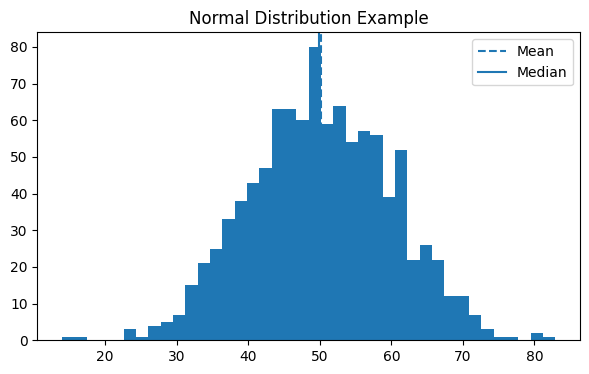

In [28]:
data = np.random.normal(loc=50, scale=10, size=1000)

mean = np.mean(data)
median = np.median(data)

plt.figure(figsize=(7, 4))
plt.hist(data, bins=40)
plt.axvline(mean, linestyle='--', label='Mean')
plt.axvline(median, linestyle='-', label='Median')

plt.title('Normal Distribution Example')
plt.legend()
plt.show()


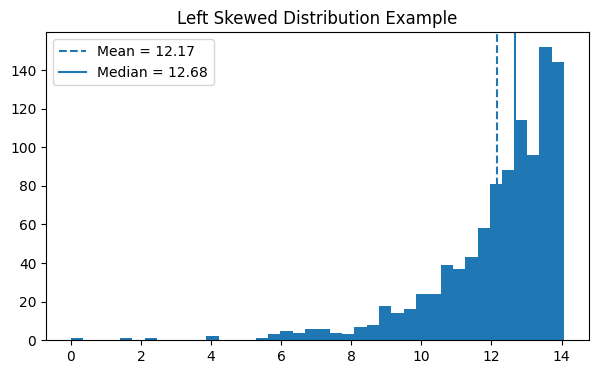

In [29]:
# Left skewed data example
data = np.random.exponential(scale=2, size=1000)
data = -data + max(data)   # flip to left skew

mean = np.mean(data)
median = np.median(data)

plt.figure(figsize=(7, 4))
plt.hist(data, bins=40)
plt.axvline(mean, linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(median, linestyle='-', label=f'Median = {median:.2f}')

plt.title('Left Skewed Distribution Example')
plt.legend()
plt.show()


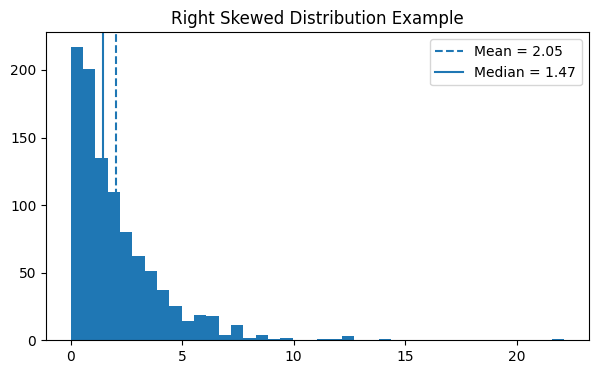

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Right skewed data
data = np.random.exponential(scale=2, size=1000)

mean = np.mean(data)
median = np.median(data)

plt.figure(figsize=(7, 4))
plt.hist(data, bins=40)
plt.axvline(mean, linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(median, linestyle='-', label=f'Median = {median:.2f}')

plt.title('Right Skewed Distribution Example')
plt.legend()
plt.show()
